# **Principal Component Analysis (PCA) Enhancement**

## Introduction
In this enhanced notebook, we will delve deeper into the concept of Principal Component Analysis (PCA). PCA is a powerful linear dimensionality reduction technique widely used in data preprocessing, visualization, and speeding up machine learning algorithms. We will start by understanding the mathematical foundation of PCA, followed by visualizing the process and applying it to real-world datasets.

## Detailed Explanation of PCA
PCA transforms the data into a new coordinate system where the greatest variance of the data comes to lie on the first coordinate (first principal component), the second greatest variance on the second coordinate, and so on.

### Steps to Compute PCA
1. **Standardize the Data**: Center the data by subtracting the mean.
2. **Compute the Covariance Matrix**: Measure the relationship between different features in the data.
3. **Compute Eigenvalues and Eigenvectors**: Determine the principal components.
4. **Sort Eigenvalues and Select Principal Components**: Rank the eigenvalues and select the top components.
5. **Transform the Data**: Project the data onto the selected principal components.

### Mathematical Background
Let $X$ be the dataset with $n$ samples and $p$ features. The steps to compute PCA are as follows:

1. **Standardize the Data**:
$$
X_{std} = \frac{X - \mu}{\sigma}
$$

2. **Compute the Covariance Matrix**:
$$
C = \frac{1}{n-1} (X_{std}^T X_{std})
$$

3. **Compute Eigenvalues and Eigenvectors**:
Solve the equation:
$$
C v = \lambda v
$$
where $v$ is the eigenvector and $\lambda$ is the eigenvalue.

4. **Sort and Select Principal Components**:
Rank the eigenvalues in descending order and select the top $k$ components.

5. **Transform the Data**:
Project the data onto the principal components:
$$
Z = X_{std} W
$$
where $W$ is the matrix of the top $k$ eigenvectors.

Let's break down each step with intuitive explanations and visual aids.

### Step 1: Standardize the Data
Standardization ensures that each feature contributes equally to the analysis. We subtract the mean of each feature and divide by the standard deviation, transforming the data to have zero mean and unit variance.

**Intuitive Explanation**:
Imagine you have different types of fruits, and each fruit has measurements in different units (e.g., length in cm, weight in grams). Standardizing the data is like converting all measurements to the same unit so they can be compared directly.

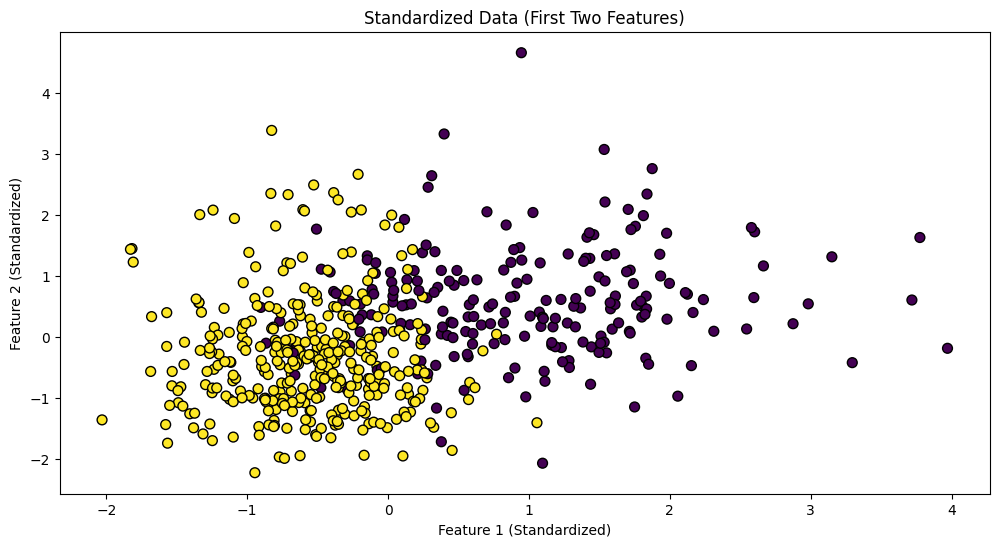

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Plot the standardized data (first two features)
plt.figure(figsize=(12, 6))
plt.scatter(X_std[:, 0], X_std[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Standardized Data (First Two Features)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

### Step 2: Compute the Covariance Matrix
The covariance matrix captures the relationships between the features. It shows how changes in one feature are associated with changes in another feature.

**Intuitive Explanation**:
Think of the covariance matrix as a way to measure how two variables change together. For example, if you increase the amount of study time, does the exam score also increase? The covariance matrix helps us understand these relationships.

### Step 3: Compute Eigenvalues and Eigenvectors
Eigenvalues and eigenvectors of the covariance matrix determine the principal components. The eigenvectors represent the directions of maximum variance, and the eigenvalues represent the magnitude of this variance.

**Intuitive Explanation**:
Imagine you are trying to capture the shadow of a 3D object (data) on a 2D surface. The eigenvectors show the directions where the shadow (variance) is largest, and the eigenvalues tell you how significant each direction is.

### Step 4: Sort Eigenvalues and Select Principal Components
We sort the eigenvalues in descending order and select the top k eigenvalues. The corresponding eigenvectors form the principal components.

**Intuitive Explanation**:
Sorting the eigenvalues is like ranking the importance of each direction in capturing the data's variance. We choose the top directions that capture the most significant patterns in the data.

### Step 5: Transform the Data
We project the standardized data onto the principal components, transforming it into a lower-dimensional space while retaining the most important information.

**Intuitive Explanation**:
Projecting the data onto the principal components is like taking a high-resolution photo and compressing it to a smaller size without losing the essential details.

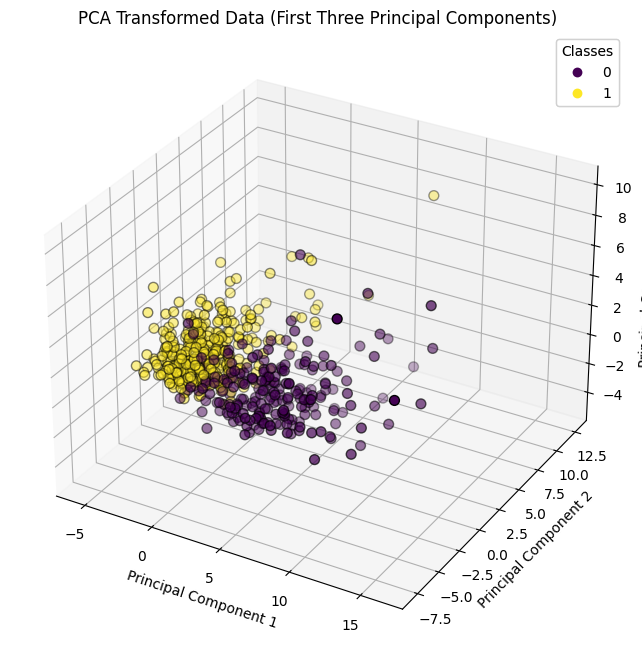

In [ ]:
from sklearn.decomposition import PCA

# Compute PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

# Plot the PCA transformed data in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', edgecolor='k', s=50)

ax.set_title('PCA Transformed Data (First Three Principal Components)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add legend with correct labels
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.show()

## Visualizing PCA
Visualizations can greatly aid in understanding the PCA process. We will use Python libraries to visualize the explained variance and the projection of data onto the principal components.

### Explained Variance
The explained variance indicates how much information (variance) can be attributed to each of the principal components. The explained variance ratio is the percentage of variance explained by each of the selected components.


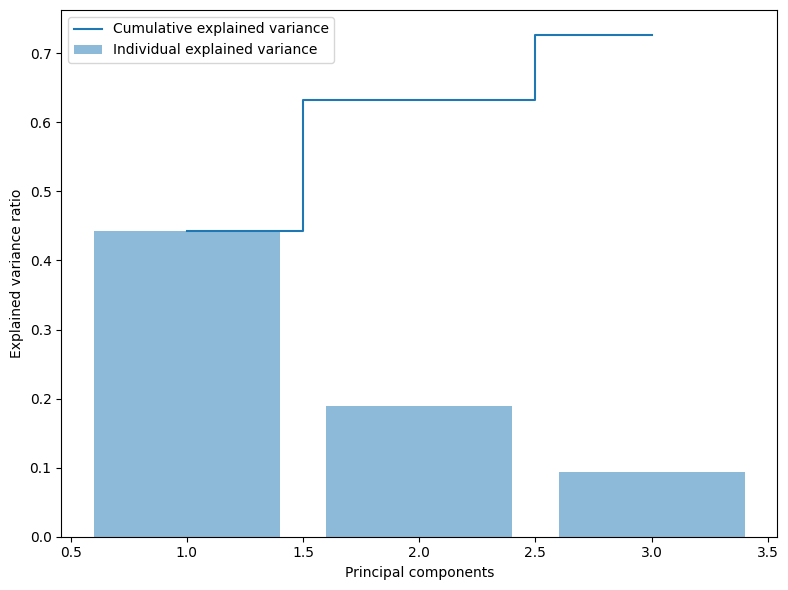

In [ ]:
# Plot the explained variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Explained Variance Plot

In this plot, we visualize the explained variance of the principal components derived from PCA. The **explained variance ratio** indicates the proportion of the dataset's total variance that is captured by each principal component. The plot has two key elements:

1. **Individual Explained Variance (Bar Plot)**:
    - The bars represent the explained variance ratio for each principal component individually.
    - The height of each bar indicates how much of the total variance is explained by that specific principal component.

2. **Cumulative Explained Variance (Line Plot)**:
    - The line represents the cumulative explained variance, which is the sum of the explained variance ratios of all principal components up to that point.
    - It shows how much of the total variance is captured as we add more principal components.

From the plot, we observe the following:

- **Principal Component 1** explains about 40% of the total variance. This is evident from the height of the first bar.
- **Principal Component 2** explains an additional 20% of the variance, bringing the cumulative explained variance to about 60%. This is indicated by the height of the second bar and the step in the cumulative variance line.
- **Principal Component 3** explains about 10% of the variance, bringing the cumulative explained variance about 70%.

This plot helps us decide the number of principal components to retain. If our goal is to capture at least 70% of the variance in the data, we can see that the first three principal components are sufficient.

By understanding this plot, we can make informed decisions about the dimensionality reduction, ensuring that we retain most of the important information in the dataset while reducing its complexity.

# Applying PCA to Real-World Datasets

Now, lets apply PCA to Real-World datasets, and visualize the results.

## Applying PCA to Iris Dataset

**Iris**

The Iris dataset is a classic dataset in machine learning and statistics.

It consists of 150 samples of iris flowers from three different species: setosa, versicolor, and virginica.

The dataset includes four features for each sample: sepal length, sepal width, petal length, and petal width.

There are three classes, each corresponding to a species of iris flower, with each class having 50 samples.

The Iris dataset is readily available in the sklearn library.

We will now apply PCA to the Iris dataset and visualize the first two principal components.


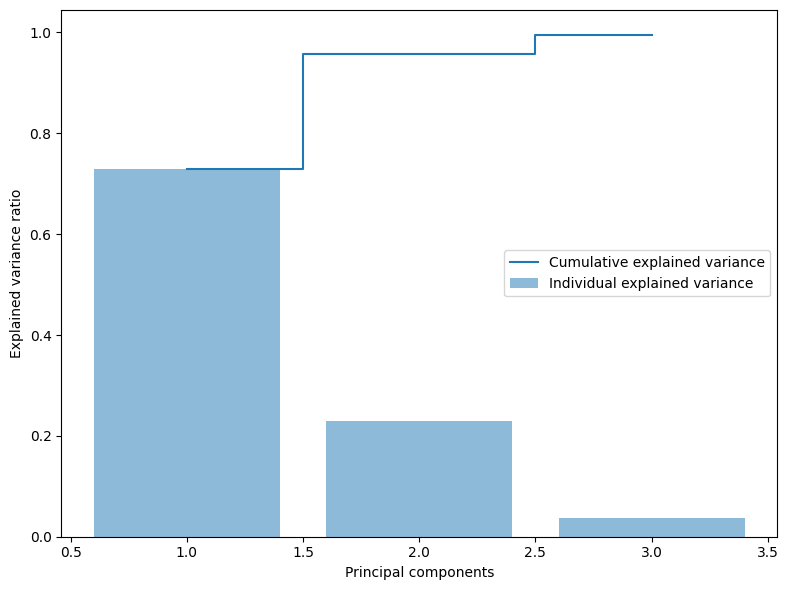

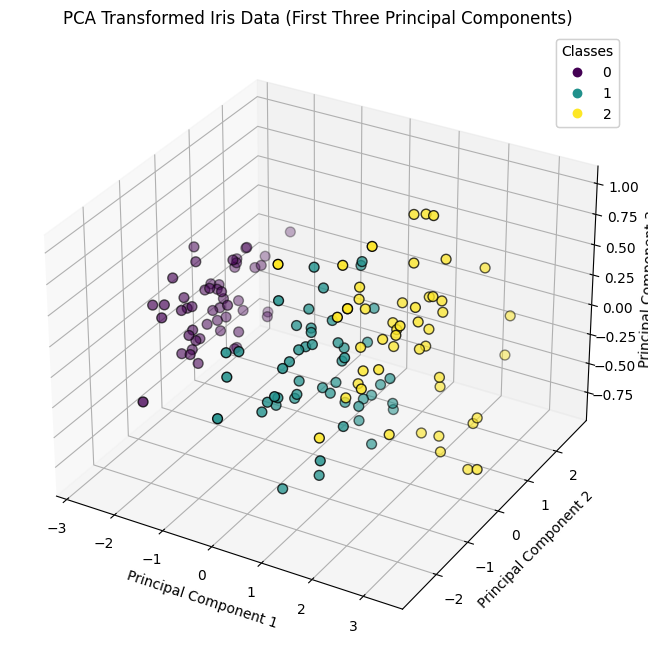

In [ ]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Compute PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

# Plot the explained variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Plot the PCA transformed data in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', edgecolor='k', s=50)

ax.set_title('PCA Transformed Iris Data (First Three Principal Components)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add legend with correct labels
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.show()

## Applying PCA to the Wine Dataset

**Wine**

The Wine dataset consists of the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.

The dataset includes 13 continuous features such as alcohol, malic acid, ash, alcalinity of ash, magnesium, total phenols, flavanoids, nonflavanoid phenols, proanthocyanins, color intensity, hue, OD280/OD315 of diluted wines, and proline.

There are three classes, each corresponding to a different wine cultivar, with a total of 178 samples in the dataset.

The Wine dataset can be easily loaded using the sklearn library.

We will now apply PCA to the Wine dataset and visualize the first two principal components.

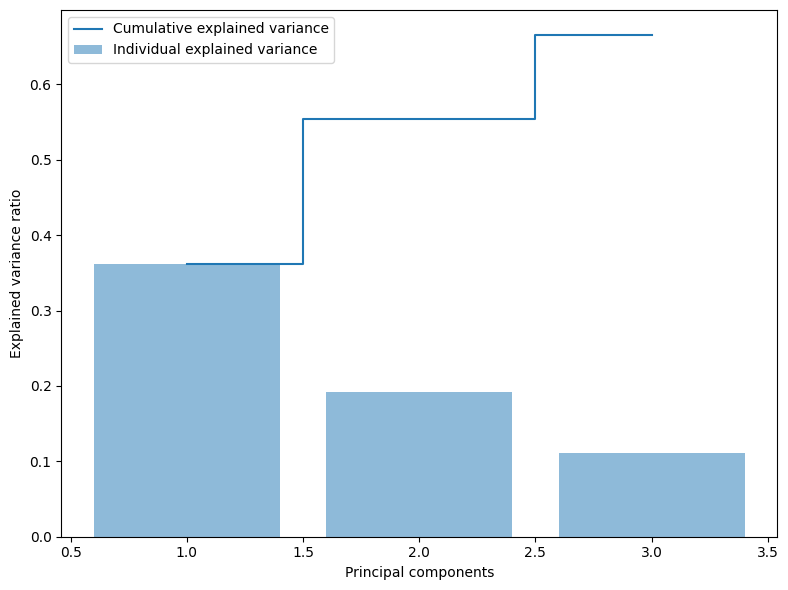

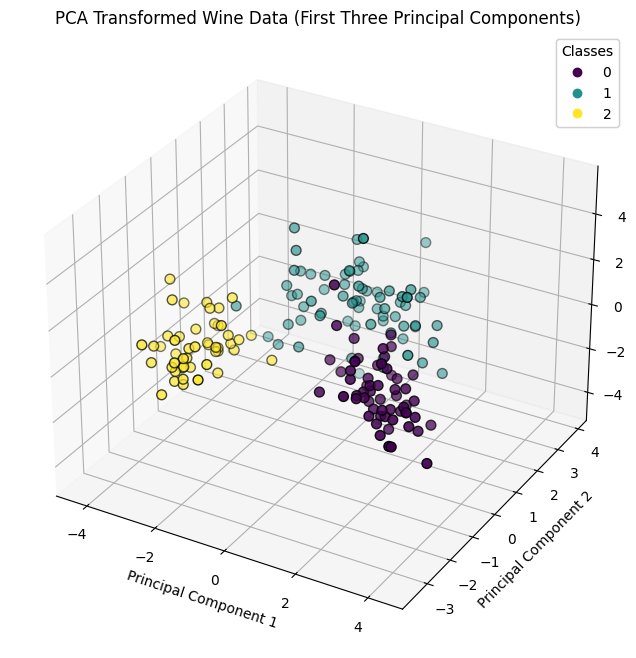

In [ ]:
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Compute PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

# Plot the explained variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Plot the PCA transformed data in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', edgecolor='k', s=50)

ax.set_title('PCA Transformed Wine Data (First Three Principal Components)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add legend with correct labels
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.show()

## Applying PCA to the Digits Dataset

**Digits**

The Digits dataset is a classic dataset used for image recognition.

It consists of 8x8 pixel images of handwritten digits.

Each image is represented by 64 features, corresponding to the pixel values of an 8x8 grid.

The dataset includes 10 classes, each corresponding to a digit from 0 to 9, with a total of 1797 samples.

The Digits dataset can be loaded using the sklearn library.

We will now apply PCA to the Digits dataset and visualize the first two principal components.

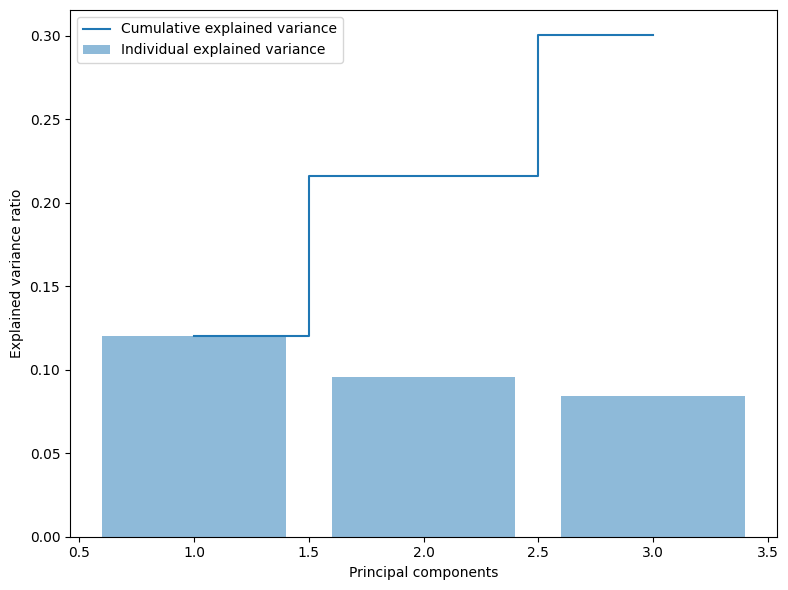

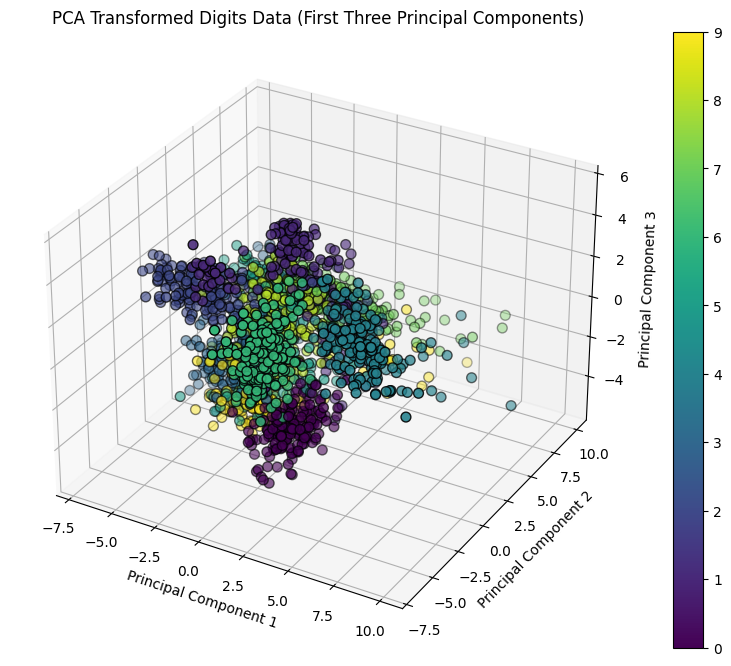

In [ ]:
from sklearn.datasets import load_digits

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Compute PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

# Plot the explained variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Plot the PCA transformed data in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', edgecolor='k', s=50)

ax.set_title('PCA Transformed Digits Data (First Three Principal Components)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add colorbar for labels
plt.colorbar(scatter)
plt.show()

# **Advantages and Disadvantages of PCA**
Principal Component Analysis (PCA) is a widely used technique for dimensionality reduction. It has several advantages and limitations, which are important to understand when applying PCA to real-world datasets.

## **Advantages of PCA**

1. **Dimensionality Reduction**:

- PCA reduces the number of dimensions (features) in the dataset while retaining most of the variance. This simplification can make data easier to visualize and analyze.

- Example: In the Iris dataset, reducing from four dimensions to two or three allows us to visualize the data in 2D or 3D plots, making it easier to see the separation between species.

2. **Noise Reduction**:

- By focusing on the components that capture the most variance, PCA can help eliminate noise and less important information from the dataset.

- Example: In image processing, PCA can be used to compress images by keeping only the principal components that capture the most information, thereby reducing noise.

3. **Improved Computational Efficiency**:

- Reducing the number of dimensions can significantly speed up machine learning algorithms, especially when dealing with large datasets.

- Example: Training a machine learning model on the Wine dataset with 13 features might be slower than training on a reduced dataset with only the top three principal components.

4. **Handling Multicollinearity**:

- PCA can help in situations where features are highly correlated with each other. By transforming the original features into a set of linearly uncorrelated components, PCA mitigates the issue of multicollinearity.

- Example: In finance, where many indicators might be correlated, PCA can be used to derive independent components for better analysis.

## **Disadvantages of PCA**

1. **Interpretability**:

- The principal components are linear combinations of the original features and can be difficult to interpret in terms of the original variables.

- Example: In the Digits dataset, the principal components are combinations of pixel values, making it hard to understand the specific contribution of each original feature (pixel) to the components.

2. **Linearity Assumption**:

- PCA assumes linear relationships between variables, which might not always be the case. Non-linear dimensionality reduction techniques might be more appropriate for certain datasets.

- Example: In datasets with complex, non-linear relationships (like certain biological data), PCA might not capture the underlying structure as effectively as methods like t-SNE or UMAP.

3. **Loss of Variance**:

- While PCA retains the components that capture the most variance, some information is always lost. The choice of how many components to retain can impact the effectiveness of the analysis.

- Example: In the Wine dataset, if only two components are retained, the analysis might lose important information that is captured by the third or fourth components.

4. **Scaling Sensitivity**:

- PCA is sensitive to the scale of the data. Features with larger scales can dominate the principal components, making standardization or normalization essential.

- Example: In the Iris dataset, if features are on different scales (e.g., sepal length in cm and petal length in mm), PCA results can be misleading unless the data is standardized.

# **Case Studies Illustrating Points**

## **Case Study 1: Image Compression**

In image compression, PCA is used to reduce the dimensionality of image data while retaining the essential features. For example, an image with 1000x1000 pixels (1 million features) can be compressed to a smaller number of components that capture the most significant patterns (edges, textures).

- Benefit: Reduced storage space and faster image processing.
- Limitation: Loss of fine details in the image.

## **Case Study 2: Financial Data Analysis**

In financial data analysis, PCA helps in reducing the number of indicators by combining correlated indicators into principal components. This makes it easier to analyze trends and patterns in financial markets.

- Benefit: Simplified analysis and handling of multicollinearity.
- Limitation: Difficulty in interpreting the principal components in terms of the original indicators.

## **Case Study 3: Genomics Data**

PCA is often applied in genomics to reduce the dimensionality of gene expression data, which typically has thousands of features (genes). This helps in visualizing the data and identifying patterns related to different conditions or treatments.

- Benefit: Visualization of high-dimensional data and identification of key patterns.
- Limitation: Non-linear relationships between genes might not be captured effectively.

# **Deep Learning Training with Digits Dataset**

Among the Iris, Wine, and Digits datasets, the Digits dataset is the most suitable for deep learning training.

The Iris and Wine datasets are more appropriate for traditional machine learning techniques due to their simplicity and smaller size.

For deep learning tasks, larger and more complex datasets like Digits are preferred, as they allow the models to learn more intricate patterns and achieve better performance.

## Step 1: Load and Perprocess the Data

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


## Step 2: Train a Deep Learning Model without PCA

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the neural network architecture
model_no_pca = Sequential()
model_no_pca.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_no_pca.add(Dropout(0.2))
model_no_pca.add(Dense(64, activation='relu'))
model_no_pca.add(Dense(10, activation='softmax'))

# Compile the model
model_no_pca.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_no_pca = model_no_pca.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/10
32/32 - 5s - loss: 1.7165 - accuracy: 0.4985 - val_loss: 1.0405 - val_accuracy: 0.7738 - 5s/epoch - 146ms/step
Epoch 2/10
32/32 - 0s - loss: 0.7575 - accuracy: 0.8398 - val_loss: 0.4841 - val_accuracy: 0.8968 - 499ms/epoch - 16ms/step
Epoch 3/10
32/32 - 0s - loss: 0.3722 - accuracy: 0.9234 - val_loss: 0.3212 - val_accuracy: 0.9087 - 347ms/epoch - 11ms/step
Epoch 4/10
32/32 - 0s - loss: 0.2419 - accuracy: 0.9413 - val_loss: 0.2690 - val_accuracy: 0.9246 - 436ms/epoch - 14ms/step
Epoch 5/10
32/32 - 1s - loss: 0.1650 - accuracy: 0.9632 - val_loss: 0.2316 - val_accuracy: 0.9246 - 529ms/epoch - 17ms/step
Epoch 6/10
32/32 - 0s - loss: 0.1246 - accuracy: 0.9682 - val_loss: 0.2212 - val_accuracy: 0.9286 - 235ms/epoch - 7ms/step
Epoch 7/10
32/32 - 0s - loss: 0.1071 - accuracy: 0.9801 - val_loss: 0.2049 - val_accuracy: 0.9365 - 284ms/epoch - 9ms/step
Epoch 8/10
32/32 - 0s - loss: 0.0856 - accuracy: 0.9811 - val_loss: 0.1972 - val_accuracy: 0.9405 - 255ms/epoch - 8ms/step
Epoch 9/10
32

## Step 3: Train a Deep Learning Model with PCA

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to the training and testing data
n_components = 30  # Number of principal components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define the neural network architecture
model_pca = Sequential()
model_pca.add(Dense(128, activation='relu', input_shape=(n_components,)))
model_pca.add(Dropout(0.2))
model_pca.add(Dense(64, activation='relu'))
model_pca.add(Dense(10, activation='softmax'))

# Compile the model
model_pca.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_pca = model_pca.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/10
32/32 - 4s - loss: 1.8357 - accuracy: 0.4567 - val_loss: 1.1890 - val_accuracy: 0.7976 - 4s/epoch - 123ms/step
Epoch 2/10
32/32 - 0s - loss: 0.9061 - accuracy: 0.8408 - val_loss: 0.5708 - val_accuracy: 0.8810 - 348ms/epoch - 11ms/step
Epoch 3/10
32/32 - 1s - loss: 0.4709 - accuracy: 0.8985 - val_loss: 0.3689 - val_accuracy: 0.9206 - 586ms/epoch - 18ms/step
Epoch 4/10
32/32 - 0s - loss: 0.2836 - accuracy: 0.9413 - val_loss: 0.2852 - val_accuracy: 0.9325 - 385ms/epoch - 12ms/step
Epoch 5/10
32/32 - 0s - loss: 0.2162 - accuracy: 0.9542 - val_loss: 0.2656 - val_accuracy: 0.9246 - 355ms/epoch - 11ms/step
Epoch 6/10
32/32 - 0s - loss: 0.1631 - accuracy: 0.9562 - val_loss: 0.2507 - val_accuracy: 0.9405 - 390ms/epoch - 12ms/step
Epoch 7/10
32/32 - 1s - loss: 0.1439 - accuracy: 0.9652 - val_loss: 0.2218 - val_accuracy: 0.9405 - 504ms/epoch - 16ms/step
Epoch 8/10
32/32 - 0s - loss: 0.1164 - accuracy: 0.9731 - val_loss: 0.2186 - val_accuracy: 0.9405 - 339ms/epoch - 11ms/step
Epoch 9/10

## Step 4: Compare the Results

17/17 - 0s - loss: 0.1117 - accuracy: 0.9722 - 48ms/epoch - 3ms/step
17/17 - 0s - loss: 0.1205 - accuracy: 0.9593 - 71ms/epoch - 4ms/step
Test accuracy without PCA: 0.9722222089767456
Test accuracy with PCA: 0.9592592716217041


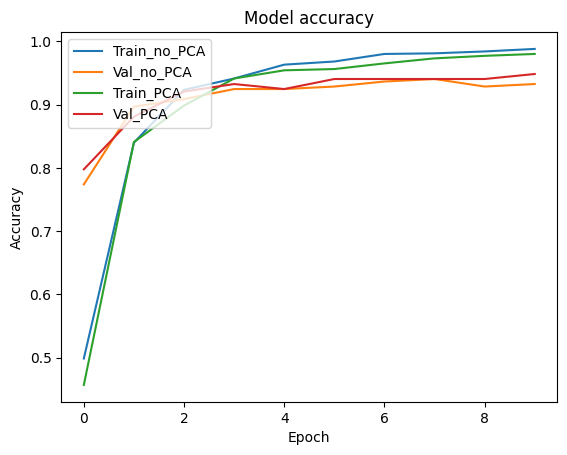

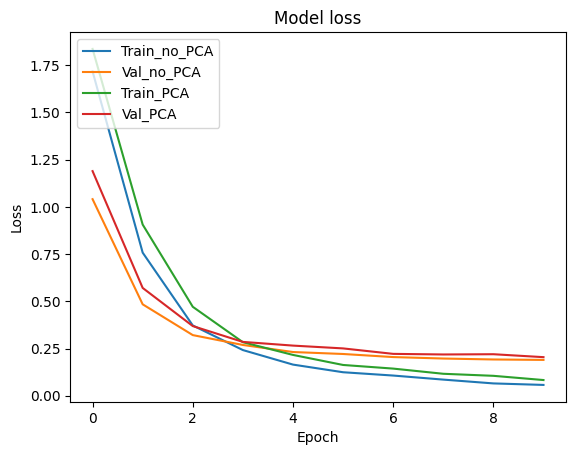

In [ ]:
# Evaluate both models on the test data
test_loss_no_pca, test_acc_no_pca = model_no_pca.evaluate(X_test, y_test, verbose=2)
test_loss_pca, test_acc_pca = model_pca.evaluate(X_test_pca, y_test, verbose=2)

print(f'Test accuracy without PCA: {test_acc_no_pca}')
print(f'Test accuracy with PCA: {test_acc_pca}')

# Plot training & validation accuracy and loss values for comparison
import matplotlib.pyplot as plt

# Accuracy comparison
plt.plot(history_no_pca.history['accuracy'])
plt.plot(history_no_pca.history['val_accuracy'])
plt.plot(history_pca.history['accuracy'])
plt.plot(history_pca.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train_no_PCA', 'Val_no_PCA', 'Train_PCA', 'Val_PCA'], loc='upper left')
plt.show()

# Loss comparison
plt.plot(history_no_pca.history['loss'])
plt.plot(history_no_pca.history['val_loss'])
plt.plot(history_pca.history['loss'])
plt.plot(history_pca.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train_no_PCA', 'Val_no_PCA', 'Train_PCA', 'Val_PCA'], loc='upper left')
plt.show()


- **Test accuracy without PCA**: 0.9722
- **Test accuracy with PCA**: 0.9593

From the results, we observe that the model trained without PCA achieved a higher test accuracy compared to the model trained with PCA. This suggests that, for the Digits dataset, the original high-dimensional data provides more discriminative power for the deep learning model compared to the reduced-dimensional data obtained through PCA.

However, PCA still plays a crucial role in reducing computational complexity and may be beneficial in scenarios where dimensionality is extremely high or when the computational resources are limited. The choice between using PCA or not should consider the specific context and requirements of the problem at hand.
